In [1]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=c8f34c2770451cc90cd2386b149e9b0d41399feb0fc60ab3118503490c5a92db
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [2]:
import pyforest
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [3]:
# enabling the GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12385630915505559035
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 733760107132475574
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10765824437933477827
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150603072
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16192383586631333234
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [5]:
PATH = '/content/drive/My Drive/Janathahack_computer vision hackathon/'
IMAGE_PATH = PATH +'images/'

BATCH_SIZE = 16
EPOCHS = 100

In [6]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
train.shape

(1646, 2)

In [8]:
test.shape

(706, 1)

In [9]:

train_image = []
train_label = []
for i in tqdm_notebook(range(train.shape[0])):
  image_name = train.loc[i,'image_names']
  label = train.loc[i, 'emergency_or_not']
  file = IMAGE_PATH + image_name
  img = load_img(file)
  img_array = img_to_array(img).reshape(224,224,3)
  train_image.append(img_array)
  train_label.append(label)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  get_user_symbols,


In [10]:
print(len(train_image))
print(len(train_label))

1646
1646


In [11]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(np.array(train_image), train_label, test_size=0.20, \
                                                  random_state=2, stratify= train_label)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

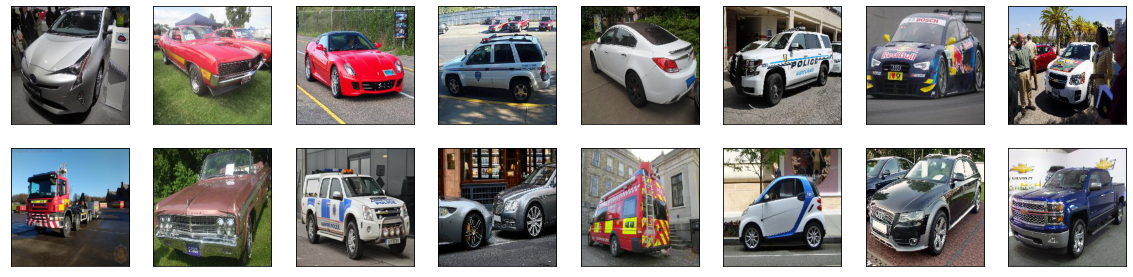

In [12]:
plt.figure(figsize = (20, 10))
for ix, image in enumerate(train_image[:16]):
    plt.subplot(4, 8, ix + 1)
    plt.imshow(image / 255.0)
    plt.xticks([])
    plt.yticks([])  

In [13]:

train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range=0.2,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
rotation_range=20)

valid_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range=0.2,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
rotation_range=20)

In [14]:
#Create the image generators
train_generator = train_datagen.flow(x_train, y_train,batch_size=BATCH_SIZE)
val_generator = valid_datagen.flow(x_val, y_val, batch_size=BATCH_SIZE)

In [ ]:
from keras import applications
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

In [ ]:
# for i, layer in enumerate(model.layers):
#    print(i, layer.name)

In [ ]:
# for layer in model.layers[:5]:
#     layer.trainable = False
#best results when freezing two layers
for layer in model.layers[:2]:
    layer.trainable = False


In [ ]:
from keras.regularizers import l2
x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
# x = Dense(512, activity_regularizer=l2(0.001), activation="relu")(x)
# x = Dropout(0.55)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [ ]:
model_final = Model(input = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



In [ ]:
# model_final.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=1e-4,momentum=0.9), metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint(PATH + "frozen1_sgd.h5", monitor='val_loss', verbose=1, save_best_only=True, \
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [ ]:
#get the length of the train and validation data
ntrain = len(x_train)
nval = len(x_val)

In [ ]:
history = model_final.fit_generator(
train_generator,
steps_per_epoch = ntrain//BATCH_SIZE,
epochs = EPOCHS,
validation_data = val_generator,
validation_steps = nval//BATCH_SIZE,
callbacks = [checkpoint, early])

Epoch 1/100
82/82 [==============================] - 31s 375ms/step - loss: 0.4345 - accuracy: 0.7908 - val_loss: 0.4621 - val_accuracy: 0.8781

Epoch 00001: val_loss improved from inf to 0.46210, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen1_sgd.h5
Epoch 2/100
82/82 [==============================] - 31s 381ms/step - loss: 0.3325 - accuracy: 0.8620 - val_loss: 0.4812 - val_accuracy: 0.8949

Epoch 00002: val_loss did not improve from 0.46210
Epoch 3/100
82/82 [==============================] - 31s 378ms/step - loss: 0.2490 - accuracy: 0.9045 - val_loss: 0.3972 - val_accuracy: 0.8885

Epoch 00003: val_loss improved from 0.46210 to 0.39717, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen1_sgd.h5
Epoch 4/100
82/82 [==============================] - 31s 384ms/step - loss: 0.2552 - accuracy: 0.9008 - val_loss: 0.3426 - val_accuracy: 0.8981

Epoch 00004: val_loss improved from 0.39717 to 0.34259, saving model to /co

In [ ]:
test_image = []
for i in tqdm_notebook(range(test.shape[0])):
  image_name = test.loc[i,'image_names']
  file = IMAGE_PATH + image_name
  img = load_img(file)
  img_array = img_to_array(img)
  img_array = img_array/255
  img_array = np.expand_dims(img_array, axis=0)
  test_image.append(img_array)
  

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_final.load_weights(PATH +"frozen1_sgd.h5")
classes_2 = []
for i in test_image:
  preds = model_final.predict(i)
  classes_2.append(preds)

In [ ]:
# res_3 = []
# for i,j in zip(classes_2,classes_3):
#   val = (i+j)/2
#   if val<0.5:
#     res_3.append(0)
#   else:
#     res_3.append(1)

In [ ]:
res_2 = []
for i in classes_2:
  if i<=0.5:
    res_2.append(0)
  else:
    res_2.append(1)

In [ ]:
from collections import Counter
Counter(res_2)

Counter({0: 416, 1: 290})

In [ ]:
test['emergency_or_not'] = res_2

In [ ]:
test.to_csv('vgg.csv', index=False)

RESNET 50

In [17]:
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(224, 224, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [28]:
# for i, layer in enumerate(resnet.layers):
#    print(i, layer.name)

for layer in resnet.layers[:]:
    layer.trainable = False


In [29]:
from keras.regularizers import l2
x = resnet.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
# x = Dense(512, activity_regularizer=l2(0.001), activation="relu")(x)
# x = Dropout(0.55)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [30]:
model_final = Model(input = resnet.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # -*- coding: utf-8 -*-


In [31]:
from keras.utils.vis_utils import plot_model
# 
model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=1e-4,momentum=0.9), metrics=["accuracy"])

In [32]:
checkpoint = ModelCheckpoint(PATH + "frozen_inceptive.h5", monitor='val_loss', verbose=1, save_best_only=True, \
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [33]:
#get the length of the train and validation data
ntrain = len(x_train)
nval = len(x_val)

In [34]:
history = model_final.fit_generator(
train_generator,
steps_per_epoch = ntrain//BATCH_SIZE,
epochs = EPOCHS,
validation_data = val_generator,
validation_steps = nval//BATCH_SIZE,
callbacks = [checkpoint, early])

Epoch 1/100
82/82 [==============================] - 29s 351ms/step - loss: 0.4981 - accuracy: 0.8154 - val_loss: 0.7178 - val_accuracy: 0.3969

Epoch 00001: val_loss improved from inf to 0.71776, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_inceptive.h5
Epoch 2/100
82/82 [==============================] - 26s 321ms/step - loss: 0.3104 - accuracy: 0.8931 - val_loss: 0.7264 - val_accuracy: 0.5159

Epoch 00002: val_loss did not improve from 0.71776
Epoch 3/100
82/82 [==============================] - 26s 313ms/step - loss: 0.2357 - accuracy: 0.9177 - val_loss: 0.6844 - val_accuracy: 0.5510

Epoch 00003: val_loss improved from 0.71776 to 0.68437, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_inceptive.h5
Epoch 4/100
82/82 [==============================] - 26s 321ms/step - loss: 0.2267 - accuracy: 0.9177 - val_loss: 0.6570 - val_accuracy: 0.5732

Epoch 00004: val_loss improved from 0.68437 to 0.65705, saving mo

INCEPTION

In [ ]:

from keras.applications import InceptionV3,MobileNet

# mb = MobileNet(weights='imagenet',include_top=False)
inception = InceptionV3(weights='imagenet', include_top=False,input_shape = (224, 224, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# for i, layer in enumerate(mb.layers):
#    print(i, layer.name)

In [ ]:
for layer in inception.layers[: 112]: 
  layer.trainable = False 

for layer in inception.layers[112:]: 
  layer.trainable = True 

In [ ]:
from keras.regularizers import l2
x = inception.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
# x = Flatten()(x)
# x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
# x = Dense(512, activity_regularizer=l2(0.001), activation="relu")(x)
# x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [ ]:
model_final = Model(input = inception.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:1: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



In [ ]:
# model_final.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
# 
model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=1e-4,momentum=0.9), metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint(PATH + "frozen_inceptive.h5", monitor='val_loss', verbose=1, save_best_only=True, \
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [ ]:
#get the length of the train and validation data
ntrain = len(x_train)
nval = len(x_val)

In [ ]:
history = model_final.fit_generator(
train_generator,
steps_per_epoch = ntrain//BATCH_SIZE,
epochs = EPOCHS,
validation_data = val_generator,
validation_steps = nval//BATCH_SIZE,
callbacks = [checkpoint, early])

Epoch 1/100
82/82 [==============================] - 34s 410ms/step - loss: 0.6836 - accuracy: 0.5885 - val_loss: 0.4653 - val_accuracy: 0.7844

Epoch 00001: val_loss improved from inf to 0.46528, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_inceptive.h5
Epoch 2/100
82/82 [==============================] - 21s 258ms/step - loss: 0.5758 - accuracy: 0.7038 - val_loss: 0.4575 - val_accuracy: 0.8217

Epoch 00002: val_loss improved from 0.46528 to 0.45753, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_inceptive.h5
Epoch 3/100
82/82 [==============================] - 21s 257ms/step - loss: 0.4856 - accuracy: 0.7777 - val_loss: 0.3364 - val_accuracy: 0.8408

Epoch 00003: val_loss improved from 0.45753 to 0.33637, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_inceptive.h5
Epoch 4/100
82/82 [==============================] - 21s 261ms/step - loss: 0.4405 - accuracy: 0.8162 - val

MOBILENET

In [ ]:

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(1,activation='sigmoid')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [ ]:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

In [ ]:
checkpoint = ModelCheckpoint(PATH + "frozen_mn.h5", monitor='val_loss', verbose=1, save_best_only=True, \
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:14]:
    layer.trainable=False
# for layer in model.layers[17:]:
#     layer.trainable=True

model.compile(optimizer= optimizers.SGD(lr=1e-5,momentum=0.9),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit_generator(
train_generator,
steps_per_epoch = ntrain//BATCH_SIZE,
epochs = EPOCHS,
validation_data = val_generator,
validation_steps = nval//BATCH_SIZE,
callbacks = [checkpoint, early])

Epoch 1/100
82/82 [==============================] - 28s 339ms/step - loss: 0.6624 - accuracy: 0.6000 - val_loss: 0.6995 - val_accuracy: 0.5938

Epoch 00001: val_loss improved from inf to 0.69946, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_mn.h5
Epoch 2/100
82/82 [==============================] - 24s 291ms/step - loss: 0.6560 - accuracy: 0.6000 - val_loss: 0.6272 - val_accuracy: 0.5892

Epoch 00002: val_loss improved from 0.69946 to 0.62723, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_mn.h5
Epoch 3/100
82/82 [==============================] - 24s 288ms/step - loss: 0.6436 - accuracy: 0.6377 - val_loss: 0.6428 - val_accuracy: 0.6115

Epoch 00003: val_loss did not improve from 0.62723
Epoch 4/100
82/82 [==============================] - 23s 284ms/step - loss: 0.6306 - accuracy: 0.6392 - val_loss: 0.6399 - val_accuracy: 0.6338

Epoch 00004: val_loss did not improve from 0.62723
Epoch 5/100
82/82 [=========

In [ ]:

# print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
# inception.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights after freezing the conv base: 71


In [ ]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
from keras import optimizers

model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [ ]:
checkpoint = ModelCheckpoint(PATH + "frozen_sgd_inception.h5", monitor='val_loss', verbose=1, save_best_only=True, \
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [ ]:
history1 = model2.fit_generator(
train_generator,
steps_per_epoch = ntrain//BATCH_SIZE,
epochs = EPOCHS,
validation_data = val_generator,
validation_steps = nval//BATCH_SIZE,
callbacks = [checkpoint, early])

Epoch 1/100
82/82 [==============================] - 38s 464ms/step - loss: 0.4813 - acc: 0.7608 - val_loss: 0.1592 - val_acc: 0.9000

Epoch 00001: val_loss improved from inf to 0.15921, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_sgd_inception.h5
Epoch 2/100
82/82 [==============================] - 22s 272ms/step - loss: 0.3401 - acc: 0.8585 - val_loss: 0.5438 - val_acc: 0.9172

Epoch 00002: val_loss did not improve from 0.15921
Epoch 3/100
82/82 [==============================] - 22s 263ms/step - loss: 0.3188 - acc: 0.8762 - val_loss: 0.0247 - val_acc: 0.9108

Epoch 00003: val_loss improved from 0.15921 to 0.02475, saving model to /content/drive/My Drive/Janathahack_computer vision hackathon/frozen_sgd_inception.h5
Epoch 4/100
82/82 [==============================] - 22s 268ms/step - loss: 0.3121 - acc: 0.8538 - val_loss: 0.4010 - val_acc: 0.9076

Epoch 00004: val_loss did not improve from 0.02475
Epoch 5/100
82/82 [===========================

In [ ]:
model2.load_weights(PATH +"frozen_sgd_inception.h5")
classes_2 = []
for i in test_image:
  preds = model2.predict(i)
  classes_2.append(preds)

In [ ]:
res_2 = []
for i in classes_2:
  if i<=0.5:
    res_2.append(0)
  else:
    res_2.append(1)

In [ ]:
test['emergency_or_not'] = res_2
test.to_csv('inception.csv', index=False)

In [ ]:
from collections import Counter
Counter(res_2)

Counter({0: 706})